In [36]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.interpolate import CubicSpline
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution
from astroML.datasets import fetch_dr7_quasar
import astropy

astropy.cosmology.Planck15

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

Nclone = 10000000

# REJECTION SAMPLING

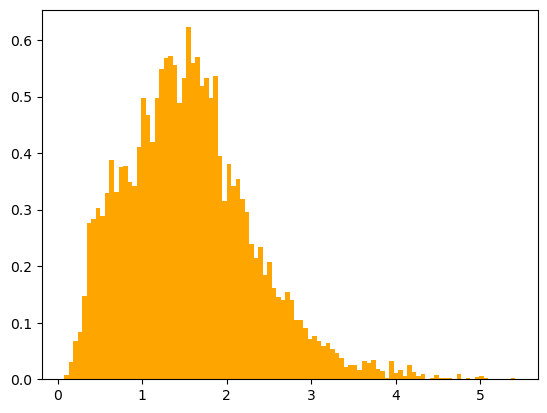

In [44]:
plt.hist(z, 100, density = True, color = 'orange')
plt.show()

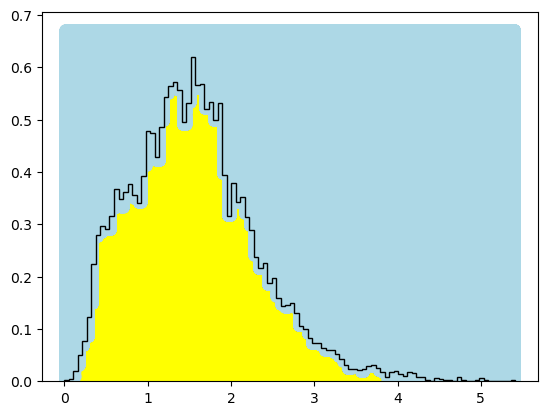

In [38]:
counts, bins = np.histogram(z, 100, density = True)

x = np.random.uniform(0,max(z),Nclone)
y = np.random.uniform(0,max(counts) + 0.05,Nclone)

ind = np.digitize(x, bins, right=True)

cont = np.zeros(len(ind))
for i in range(len(ind)):
    cont[i] = counts[ind[i]-1]

plt.scatter(x[y<cont],y[y<cont],c='yellow')
plt.scatter(x[y>cont],y[y>cont],c='lightblue')

goodpoints = x[y<cont]
plt.hist(goodpoints,bins=100,density=True,histtype='step',color='black')

plt.show()

# INVERSE TRANSFORM SAMPLING

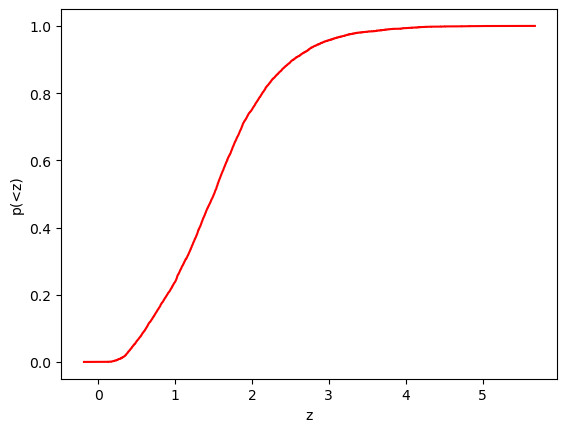

In [39]:
res = stats.ecdf(z)
ax = plt.subplot()
res.cdf.plot(ax, color = 'red')
ax.set_xlabel('z')
ax.set_ylabel('Empirical CDF')
plt.ylabel('p(<z)')
plt.xlabel('z')
plt.show()

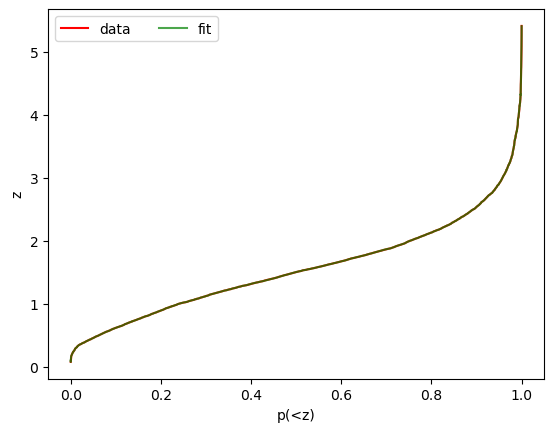

In [43]:
cs = CubicSpline(res.cdf.probabilities, res.cdf.quantiles)
plt.plot(res.cdf.probabilities, res.cdf.quantiles, label="data",color='red')
xs = np.arange(0.0, 1, 0.000001)
plt.plot(xs, cs(xs), label="fit",color='green', alpha = 0.7)
plt.legend(loc='upper left', ncol=2)
plt.xlabel('p(<z)')
plt.ylabel('z')
plt.show()

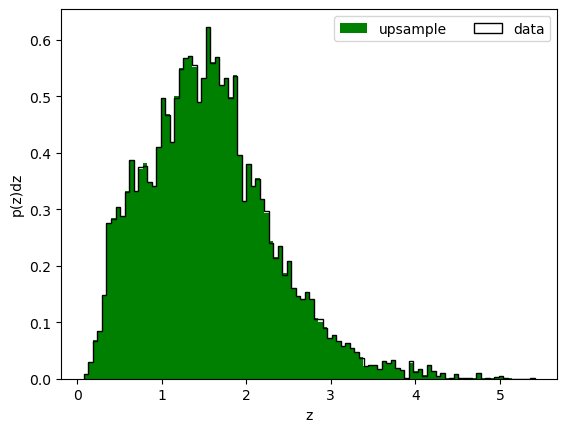

In [41]:
x_up = np.random.uniform(0,1,Nclone)
upsample = cs(x_up)
plt.hist(upsample, density=True, bins=100, label = 'upsample', color = 'green')
plt.hist(z,bins=100,density=True,histtype='step', color='black', label = 'data')
plt.legend(loc = 'upper right', ncols = 2)
plt.xlabel('z')
plt.ylabel('p(z)dz')
plt.show()